In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## The function

L2 regularization, a.k.a. ridge regression has a closed-form solution for w: $w=(X^T X + \alpha I)^{-1} X^TY$

We can then calculated predicted values of Y using: $\hat{Y} = Xw$

In practice, we can use cross-validation to determine an optimal value for alpha.

In [2]:
def weight_vector(Xmat, Y, alpha):
    # catch cases where there is only 1 feature
    if type(Xmat) != np.ndarray:
        Xmat = np.array(Xmat)
        Xmat = Xmat.reshape((len(Xmat),1))
    num_features = Xmat.shape[1]
    numerator = np.dot(Xmat.T, Xmat) + alpha*np.identity(num_features)
    numerator = np.linalg.inv(numerator)
    denominator = np.dot(Xmat.T, Y)
    w = np.dot(numerator, denominator)
    y_hat = np.dot(Xmat, w)
    return w, y_hat

### 1 Dimensional Case

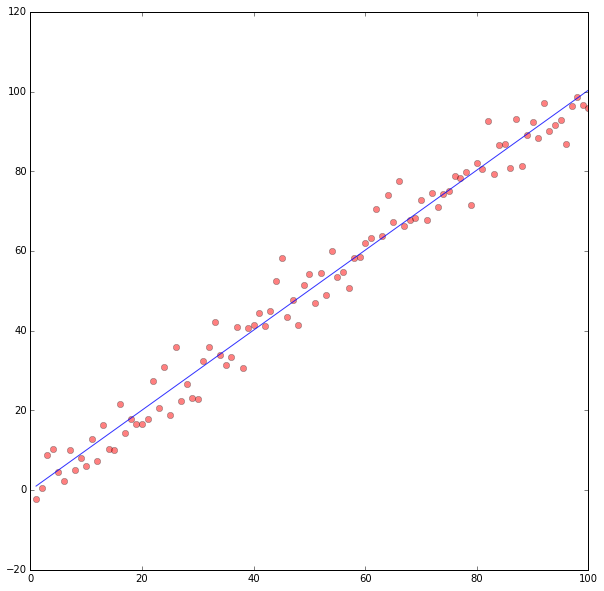

In [3]:
x_lin = range(1,101)
y_lin = range(1,101)
for i in range(len(y_lin)):
    if np.random.random(1) > 0.5:
        y_lin[i] += np.random.normal(loc=0, scale=5, size=1)[0]
    else:
        y_lin[i] -= np.random.normal(loc=0, scale=5, size=1)[0]
    
w, y_hat = weight_vector(x_lin, y_lin, alpha = 0.5)

plt.figure(figsize=(10,10))
plt.plot(x_lin, y_lin, 'ro', alpha = 0.5, color='r')
plt.plot(x_lin, y_hat, alpha = 0.8, color='b')
plt.show()

### Multidimensional case

In [4]:
# generate random data - note there will be multicollinearity between X1 and X2 due to the way I generated them.
X1 = x_lin
X2 = np.random.normal(loc=X1, scale=5, size=100)
Y = y_lin

Xmat = np.vstack((X1,X2)).T

In [5]:
w, y_hat = weight_vector(Xmat=Xmat, Y=Y, alpha=0.7)

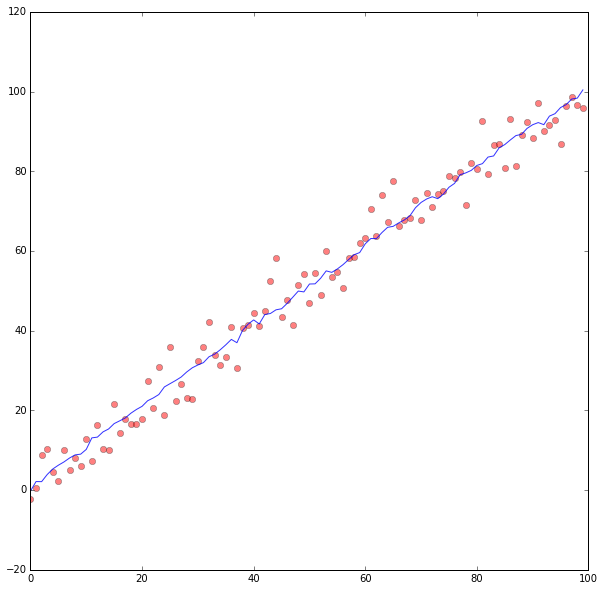

In [6]:
plt.figure(figsize=(10,10))
plt.plot(Y, 'ro', alpha = 0.5, color='r')
plt.plot(y_hat, alpha = 0.8, color='b')
plt.show()